In [2]:
import pandas as pd
print(pd.__version__)  # Should show the installed version (e.g., 2.1.0)

2.2.3


Load data set

In [3]:


# Load data
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Intellihack_TetraNeurons_02\\customer_behavior_analytcis.csv")

# Display the first 5 rows
print(df.head())

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  


In [4]:
print("Initial data shape:", df.shape)

Initial data shape: (999, 6)


In [5]:
print(df.info())  # Check for missing values and confirm df is loaded


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB
None


Show Missing Values


Missing Values Summary:
total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64


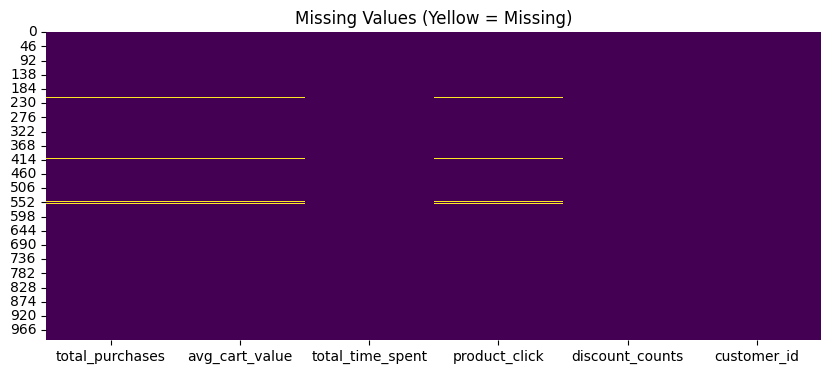

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check missing values
print("\n\033[1mMissing Values Summary:\033[0m")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values (Yellow = Missing)")
plt.show()

 Handle Missing Values

In [7]:
# Drop rows with missing values
df_clean = df.dropna()

print("\n\033[1mAfter Dropping Missing Values:\033[0m")
print(f"Rows removed: {len(df) - len(df_clean)}")
print("New shape:", df_clean.shape)

# Verify no missing values remain
print("\n\033[1mMissing Values After Cleaning:\033[0m")
print(df_clean.isnull().sum())


After Dropping Missing Values:
Rows removed: 20
New shape: (979, 6)

Missing Values After Cleaning:
total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64


Total Purchases (Before and after Cleaning)

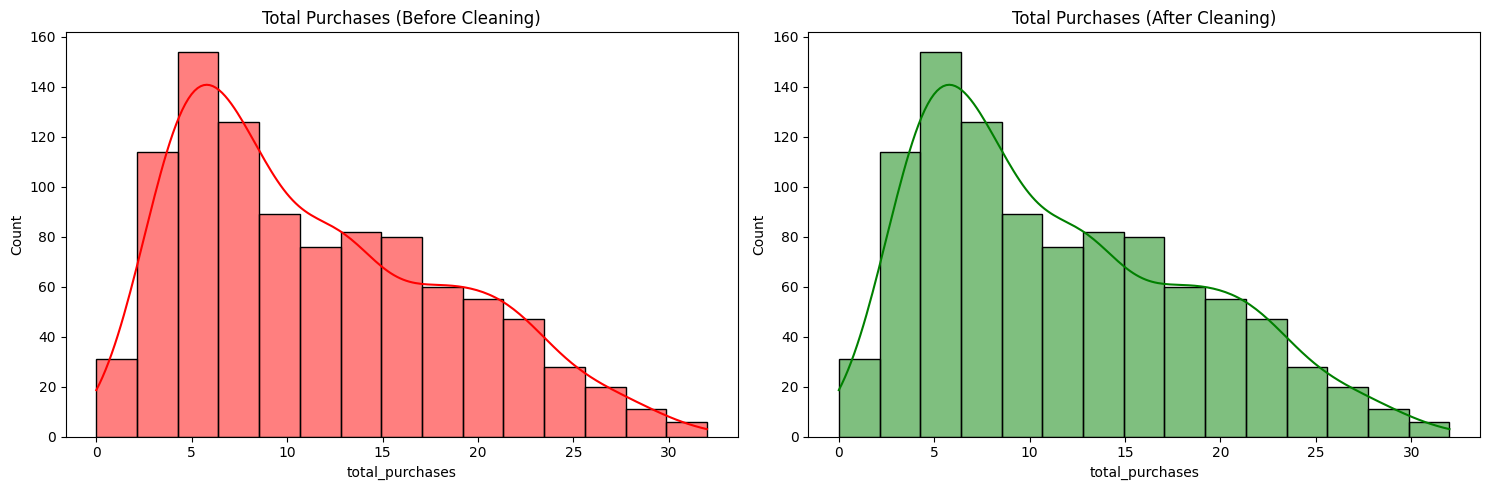

In [8]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Before cleaning
sns.histplot(df['total_purchases'], kde=True, ax=axes[0], color='red')
axes[0].set_title('Total Purchases (Before Cleaning)')

# After cleaning
sns.histplot(df_clean['total_purchases'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Total Purchases (After Cleaning)')

plt.tight_layout()
plt.show()

In [9]:

print(df.head())
print(df.describe())
print(df.isnull().sum())

   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  
       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        999.000000     979.000000   
mean         11.570991       75.457978         49.348759      28.237998   
std           7.016327       55.067835         32.730973      16.296384   
min           0.000000       10.260000          5.120000       4.000000   


Validate data cleaning process

In [10]:


print(df_clean.isnull().sum())

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64


Distributions: Use histograms/kernel density plots for each feature.

In [11]:
df = df_clean()
sns.histplot(df['total_purchases'], kde=True)
plt.title('Distribution of Total Purchases')
plt.show()

TypeError: 'DataFrame' object is not callable

customer_id is still being treated as numeric

Checking data types

In [12]:
print(df.dtypes)


total_purchases     float64
avg_cart_value      float64
total_time_spent    float64
product_click       float64
discount_counts     float64
customer_id          object
dtype: object


Convert customer_id to String

In [13]:
df['customer_id'] = df['customer_id'].astype(str)


Correlation Matrix - Check relationships between features

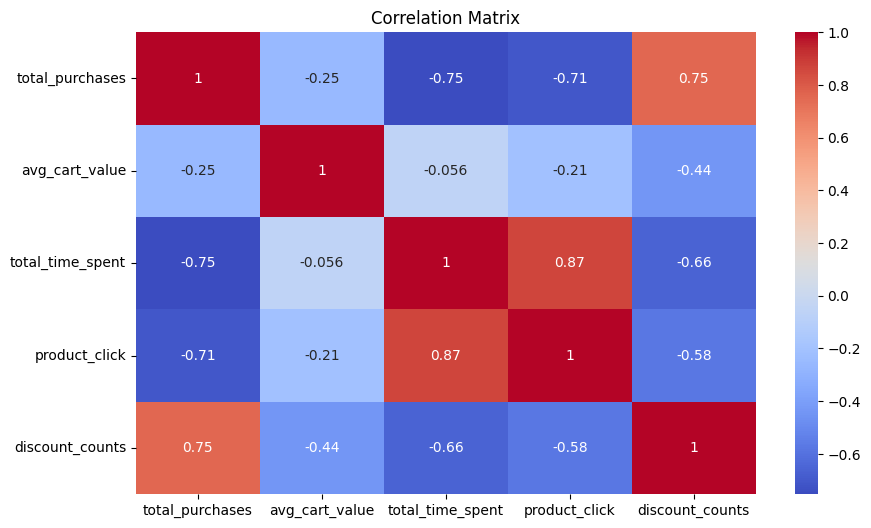

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop customer_id and ensure only numeric columns remain
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

assign cleaned data set to a variable 

In [15]:
#assigning the cleaned data to the another data
df_preprocessed = df_clean

Pair Plots - Identify clusters visually.

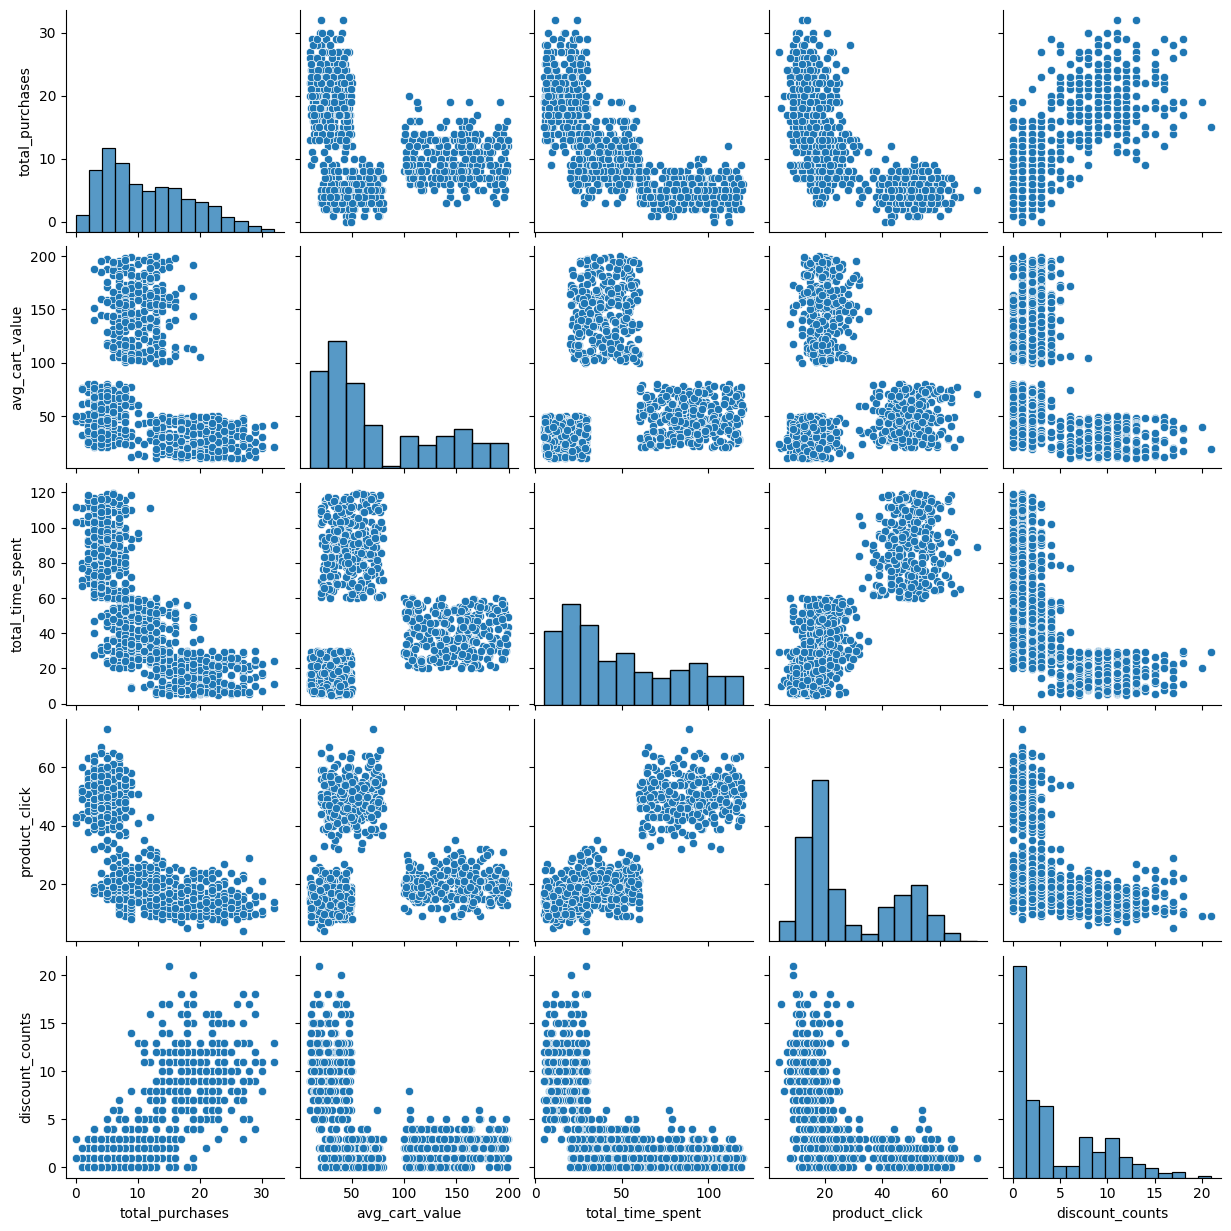

In [16]:
sns.pairplot(numeric_df[['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']])

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        979.000000     979.000000   
mean         11.570991       75.457978         49.376966      28.237998   
std           7.016327       55.067835         32.785737      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.330000      16.000000   
50%          10.000000       49.380000         40.310000      21.000000   
75%          17.000000      121.255000         77.270000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       979.000000  
mean          4.309499  
std           4.514147  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


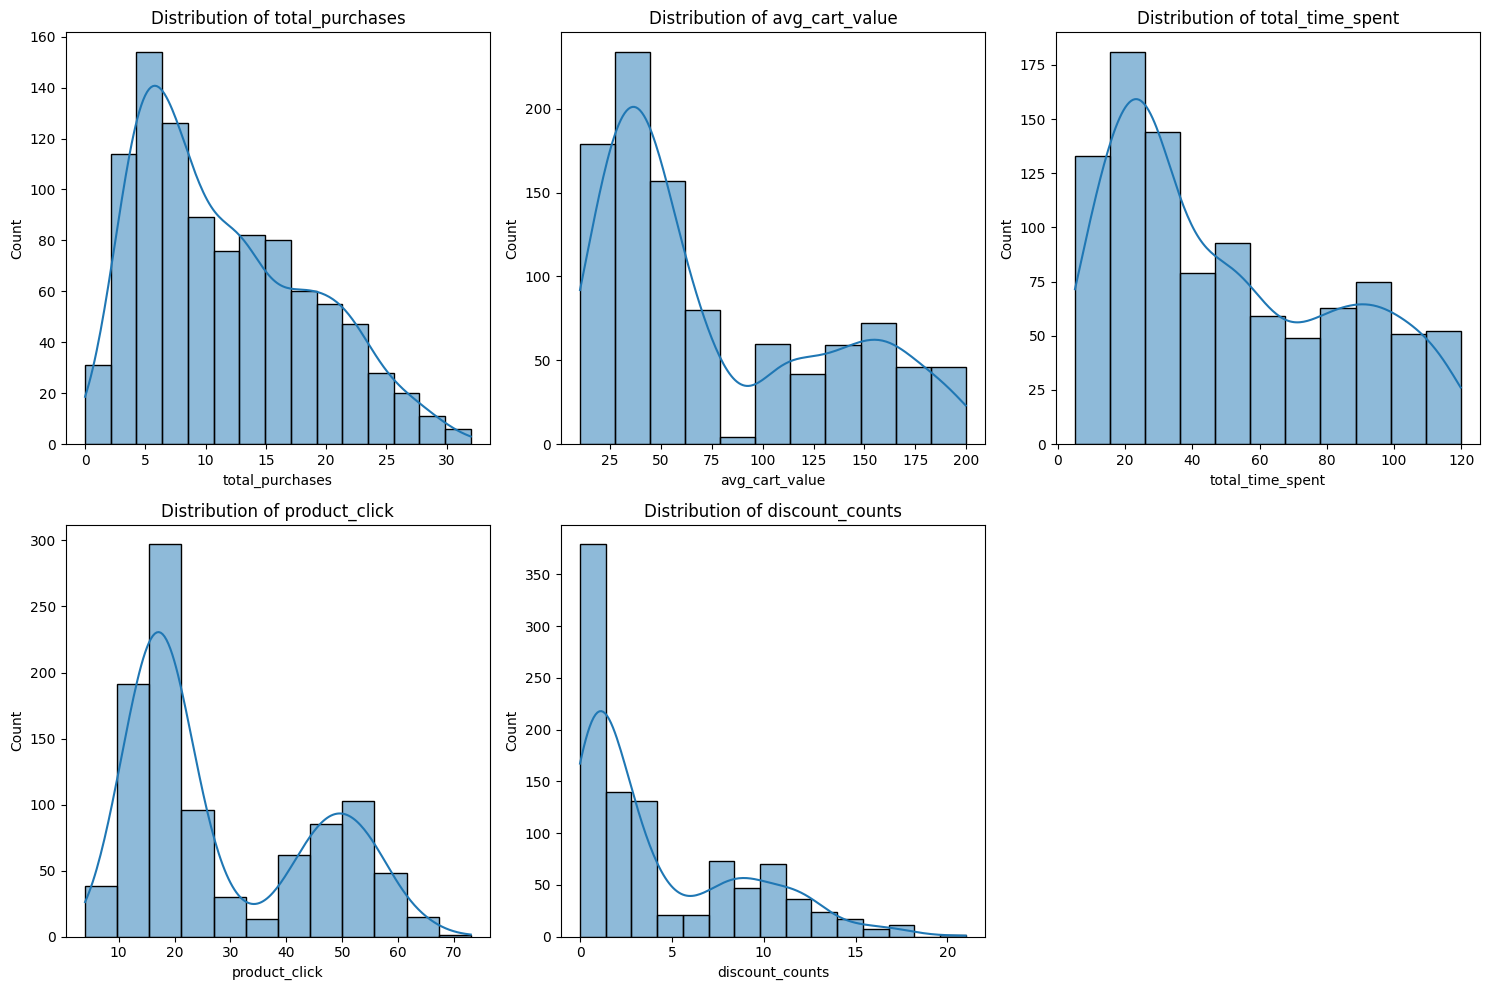

In [17]:
# Summary statistics
print(df_preprocessed.describe())

# Check distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_preprocessed.select_dtypes(include=[float, int]).columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_preprocessed[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()




Preprocessing - Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_data = df_preprocessed.select_dtypes(include=[float, int])

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Convert the scaled data back into a DataFrame if needed
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Optional: If you need to merge the scaled numeric data back with the non-numeric columns:
df_scaled = df_preprocessed.copy()
df_scaled[numeric_data.columns] = scaled_df


In [ ]:

# Standardize features again
numeric_data = df_preprocessed.select_dtypes(include=[float, int])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)


KMeans(n_clusters=3, random_state=42)

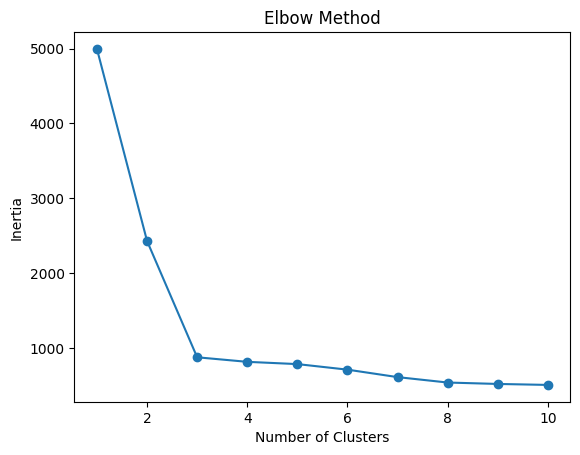

In [19]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Handle missing values by imputing the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop('customer_id', axis=1)), columns=df.drop('customer_id', axis=1).columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

# Elbow Method to determine the optimal number of clusters
inertia = []  # List to store inertia values

# Loop through possible values of k (1 to 10 clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with k clusters
    kmeans.fit(scaled_data)  # Fit the model to the scaled data
    inertia.append(kmeans.inertia_)  # Append inertia for the current k

# Plot the inertia values for each k
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')  # Label for x-axis
plt.ylabel('Inertia')  # Label for y-axis
plt.title('Elbow Method')  # Title of the plot
plt.show()  # Display the plot


Train K-Means with Optimal Clusters

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['cluster'] = clusters  # Add cluster labels

Analyze Clusters

In [21]:
print(df.dtypes)

total_purchases     float64
avg_cart_value      float64
total_time_spent    float64
product_click       float64
discount_counts     float64
customer_id          object
cluster               int32
dtype: object


In [22]:
# Drop non-numeric columns
numeric_df = df.drop('customer_id', axis=1)

In [23]:
cluster_summary = numeric_df.groupby('cluster').mean()
print(cluster_summary)

         total_purchases  avg_cart_value  total_time_spent  product_click  \
cluster                                                                     
0              10.175385      147.327169         40.472126      19.895385   
1               4.862805       49.029848         90.211837      49.716463   
2              19.711656       30.399509         17.511682      14.944785   

         discount_counts  
cluster                   
0               1.940120  
1               1.027108  
2               9.969970  


In [24]:
# 1. Check for NaNs
print("Missing values in numeric_df:\n", numeric_df.isnull().sum())

# 2. Drop rows with NaNs (if needed)
numeric_df = numeric_df.dropna()

# 3. Recalculate PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_df.drop('cluster', axis=1))

# 4. Update the dataframe
df = df.loc[numeric_df.index]  # Sync indices after dropping NaNs
df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]

# 5. Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('Customer Segments (PCA Visualization)')
plt.show()

Missing values in numeric_df:
 total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
cluster              0
dtype: int64


NameError: name 'PCA' is not defined

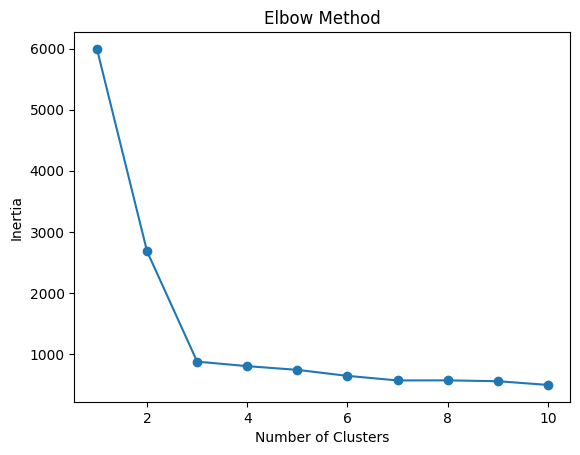

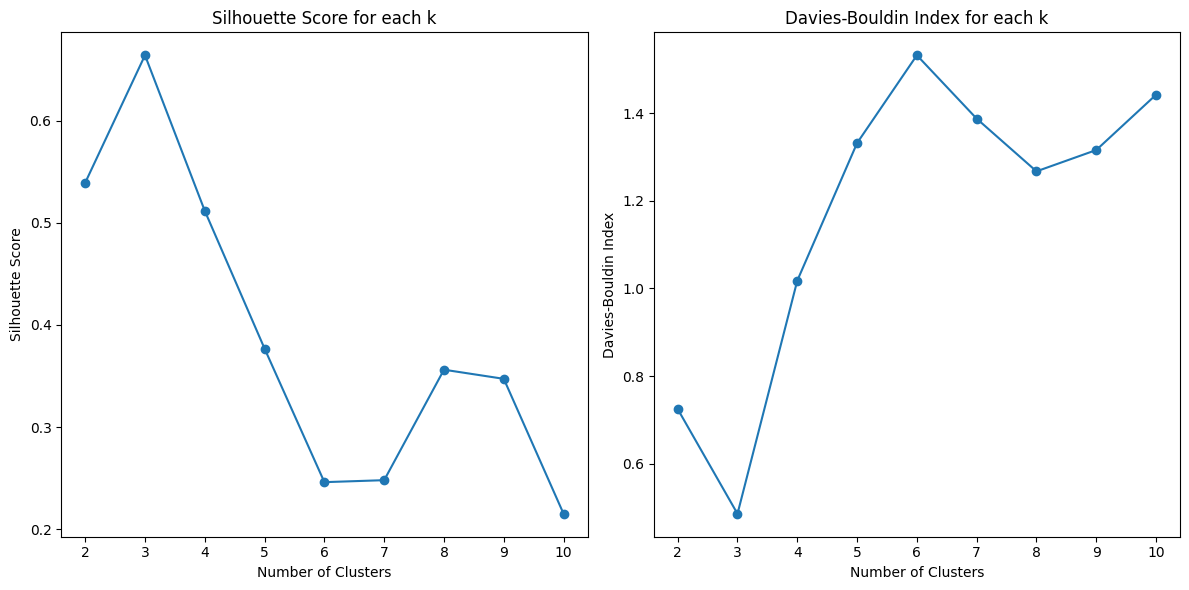

Best Clustering Evaluation Scores for k=3:
Silhouette Score: 0.6641390196697337
Davies-Bouldin Score: 0.4853227321104181
Inertia: 876.1145262035116


In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Handle missing values by imputing the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop('customer_id', axis=1)), columns=df.drop('customer_id', axis=1).columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

# Elbow Method to determine the optimal number of clusters
inertia = []
sil_scores = []
db_scores = []

# Loop through possible values of k (1 to 10 clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with k clusters
    kmeans.fit(scaled_data)  # Fit the model to the scaled data
    inertia.append(kmeans.inertia_)  # Append inertia for the current k
    
    if k > 1:  # Silhouette Score and Davies-Bouldin Score are only meaningful when there are at least 2 clusters
        sil_score = silhouette_score(scaled_data, kmeans.labels_)
        db_score = davies_bouldin_score(scaled_data, kmeans.labels_)
        sil_scores.append(sil_score)
        db_scores.append(db_score)

# Plot the inertia values for each k (Elbow Method)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Plot Silhouette Score and Davies-Bouldin Index for each k
plt.figure(figsize=(12, 6))

# Silhouette Score Plot
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for each k')

# Davies-Bouldin Index Plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), db_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for each k')

plt.tight_layout()
plt.show()

# Now let's print evaluation scores for the best k (let's assume k=3)
kmeans_best = KMeans(n_clusters=3, random_state=42)
kmeans_best.fit(scaled_data)

sil_score_best = silhouette_score(scaled_data, kmeans_best.labels_)
db_score_best = davies_bouldin_score(scaled_data, kmeans_best.labels_)
inertia_score_best = kmeans_best.inertia_

print(f'Best Clustering Evaluation Scores for k=3:')
print(f'Silhouette Score: {sil_score_best}')
print(f'Davies-Bouldin Score: {db_score_best}')
print(f'Inertia: {inertia_score_best}')


Train K-Means with Optimal Clusters

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

Compare best 3 Models

Model 1: K-Means Clustering

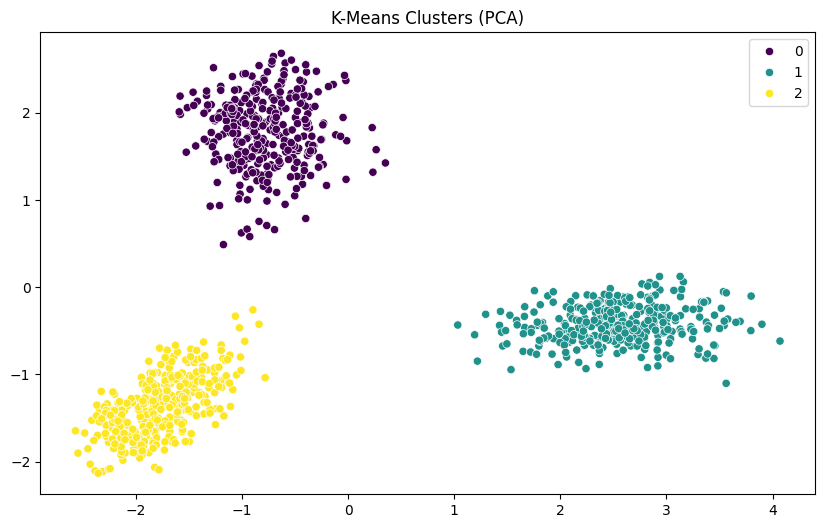

K-Means Silhouette Score: 0.664139019670
K-Means Davies-Bouldin Index: 0.485322732110


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Train K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)

# Evaluate
kmeans_silhouette = silhouette_score(scaled_data, kmeans_clusters)
kmeans_db = davies_bouldin_score(scaled_data, kmeans_clusters)

# Visualize with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_clusters, palette='viridis')
plt.title('K-Means Clusters (PCA)')
plt.show()

print(f"K-Means Silhouette Score: {kmeans_silhouette:.12f}")
print(f"K-Means Davies-Bouldin Index: {kmeans_db:.12f}")

Model 2: Gaussian Mixture Model (GMM)

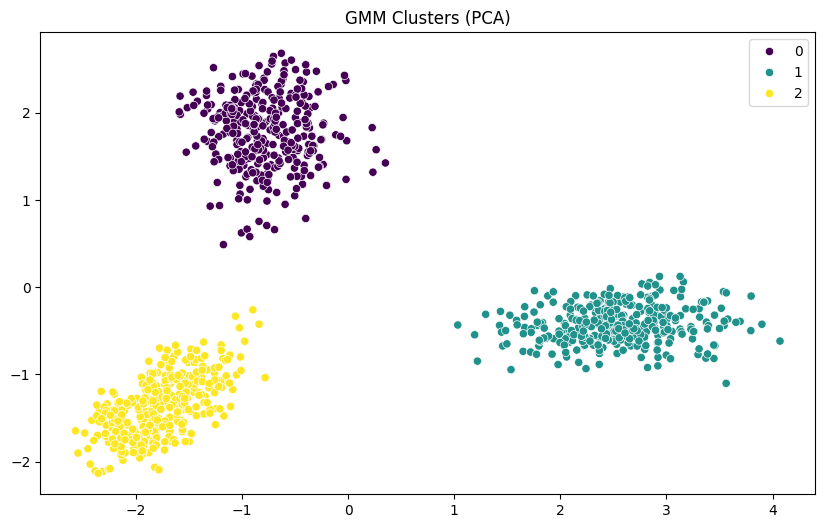

GMM Silhouette Score: 0.664139019670
GMM Davies-Bouldin Index: 0.485322732110


In [28]:
from sklearn.mixture import GaussianMixture

# Train GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(scaled_data)

# Evaluate
gmm_silhouette = silhouette_score(scaled_data, gmm_clusters)
gmm_db = davies_bouldin_score(scaled_data, gmm_clusters)

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=gmm_clusters, palette='viridis')
plt.title('GMM Clusters (PCA)')
plt.show()

print(f"GMM Silhouette Score: {gmm_silhouette:.12f}")
print(f"GMM Davies-Bouldin Index: {gmm_db:.12f}")

Model 3: Agglomerative Hierarchical Clustering

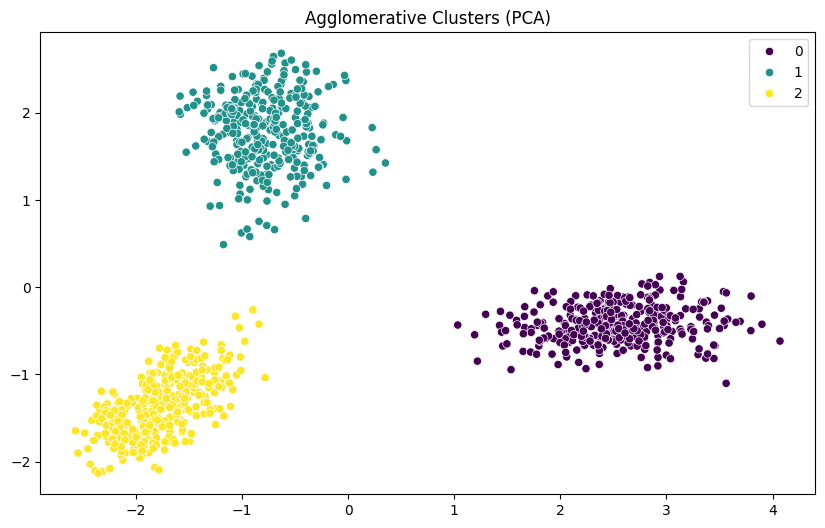

Agglomerative Silhouette Score: 0.664139019670
Agglomerative Davies-Bouldin Index: 0.485322732110


In [29]:
from sklearn.cluster import AgglomerativeClustering

# Train Agglomerative
agg = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg.fit_predict(scaled_data)

# Evaluate
agg_silhouette = silhouette_score(scaled_data, agg_clusters)
agg_db = davies_bouldin_score(scaled_data, agg_clusters)

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=agg_clusters, palette='viridis')
plt.title('Agglomerative Clusters (PCA)')
plt.show()

print(f"Agglomerative Silhouette Score: {agg_silhouette:.12f}")
print(f"Agglomerative Davies-Bouldin Index: {agg_db:.12f}")

Map Clusters to Segments

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load data (Assuming df is already defined)
print(df.dtypes)  # Check data types

# 🔹 Step 1: Exclude Non-Numeric Columns
numeric_cols = df.select_dtypes(include=['number']).columns  # Select numeric columns
df_numeric = df[numeric_cols]  # Keep only numeric columns

# 🔹 Step 2: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)  # Scale only numeric data

# 🔹 Step 3: Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(scaled_data)

# 🔹 Step 4: Add Cluster Labels Back to Original Data
df['cluster'] = kmeans_clusters  # Assign clusters
df['cluster'] = df['cluster'].astype(int)  # Ensure integer type

# 🔹 Step 5: Analyze Clusters
cluster_summary = df.groupby('cluster').mean(numeric_only=True)  # Get mean values per cluster
print(cluster_summary)

# 🔹 Step 6: Visualize Clusters using PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
pca_data = pca.fit_transform(scaled_data)

# Add PCA components to DataFrame
df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('Customer Segments (PCA Visualization)')
plt.show()


total_purchases     float64
avg_cart_value      float64
total_time_spent    float64
product_click       float64
discount_counts     float64
customer_id          object
cluster               int32
dtype: object


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [31]:
def assign_segments(cluster_means):
    """
    Maps clusters to segment names (Bargain Hunters, High Spenders, Window Shoppers)
    based on predefined business rules.
    """
    segments = {}
    
    # Rule 1: High Spenders (highest avg_cart_value, lowest discount_counts)
    high_spender_cluster = cluster_means.sort_values(
        by=['avg_cart_value', 'discount_counts'], 
        ascending=[False, True]
    ).index[0]
    segments[high_spender_cluster] = "High Spenders"
    
    # Rule 2: Bargain Hunters (highest total_purchases + discount_counts, lowest avg_cart_value)
    cluster_means['bargain_score'] = cluster_means['total_purchases'] + cluster_means['discount_counts'] - cluster_means['avg_cart_value']
    bargain_cluster = cluster_means['bargain_score'].idxmax()
    segments[bargain_cluster] = "Bargain Hunters"
    
    # Rule 3: Window Shoppers (remaining cluster)
    remaining_cluster = [c for c in cluster_means.index if c not in segments][0]
    segments[remaining_cluster] = "Window Shoppers"
    
    return segments

Model Performance:
                Silhouette  Davies-Bouldin
KMeans           0.626018        0.549986
GMM              0.626018        0.549986
Agglomerative    0.626018        0.549986


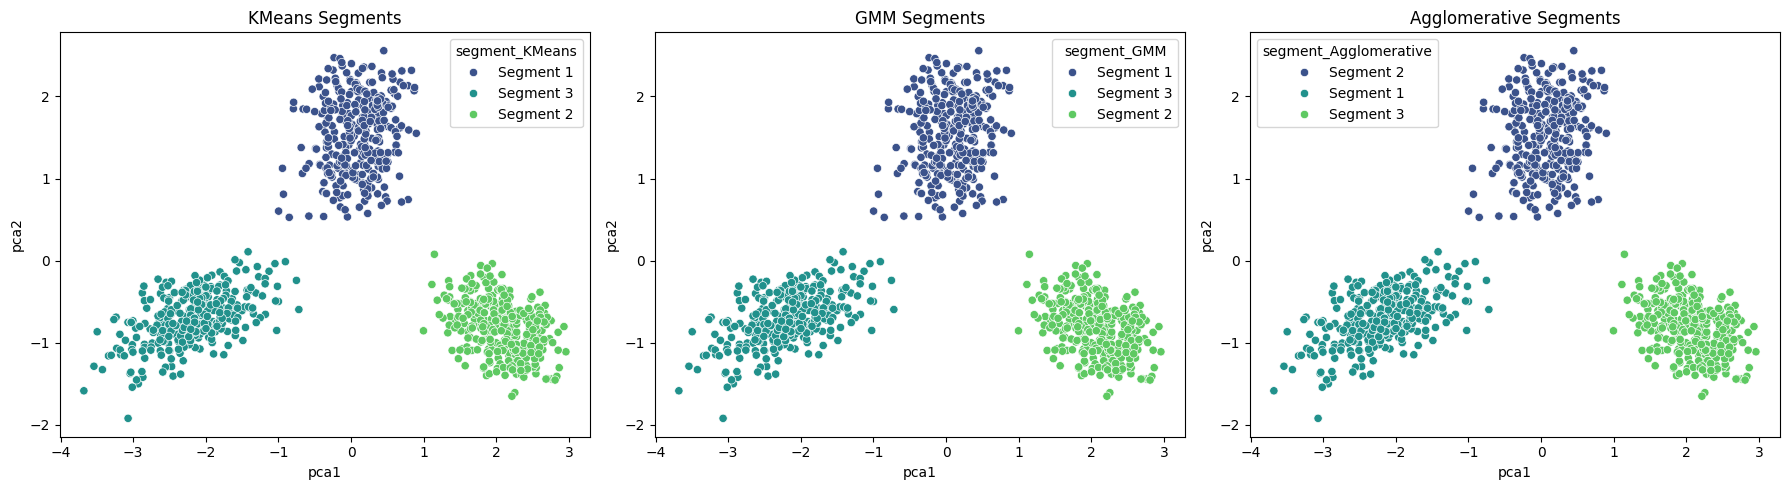

In [32]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv("customer_behavior_analytcis.csv")

# 🔹 Drop rows with missing values BEFORE using them in clustering
df = df.dropna().reset_index(drop=True)  # Reset index to maintain consistency
numeric_df = df.drop('customer_id', axis=1)

# 🔹 Standardize Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Initialize models
models = {
    "KMeans": KMeans(n_clusters=3, random_state=42, n_init=10),
    "GMM": GaussianMixture(n_components=3, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=3)
}

# Train models and assign segments
results = {}
for name, model in models.items():
    # Fit model
    clusters = model.fit_predict(scaled_data)
    
    # 🔹 Ensure the length of `clusters` matches `df`
    df[f'cluster_{name}'] = clusters  # No more length mismatch error

    # Calculate cluster means
    cluster_means = numeric_df.groupby(clusters).mean()

    # Dummy function for assigning segment names (adjust as needed)
    def assign_segments(cluster_means):
        return {i: f"Segment {i+1}" for i in range(len(cluster_means))}

    # Assign segment names
    segment_mapping = assign_segments(cluster_means)
    df[f'segment_{name}'] = df[f'cluster_{name}'].map(segment_mapping)

    # Evaluate clustering performance
    results[name] = {
        "Silhouette": silhouette_score(scaled_data, clusters),
        "Davies-Bouldin": davies_bouldin_score(scaled_data, clusters)
    }

# Compare models
results_df = pd.DataFrame(results).T
print("Model Performance:\n", results_df)

# 🔹 Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# 🔹 Ensure PCA data matches DataFrame length
df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]

# 🔹 Plot clusters for each model
models_to_plot = ["KMeans", "GMM", "Agglomerative"]
plt.figure(figsize=(18, 5))
for i, model in enumerate(models_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x='pca1', y='pca2', hue=f'segment_{model}', palette='viridis')
    plt.title(f'{model} Segments')
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load and preprocess data
df = pd.read_csv("customer_behavior_analytcis.csv")

# 🔹 Drop NaN values and reset index
df = df.dropna().reset_index(drop=True)  
numeric_df = df.drop('customer_id', axis=1)

# 🔹 Standardize Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Initialize models with proper settings
models = {
    "KMeans": KMeans(n_clusters=3, random_state=42, n_init=10),
    "GMM": GaussianMixture(n_components=3, random_state=42, covariance_type='full'),
    "Agglomerative": AgglomerativeClustering(n_clusters=3)
}

# Train models and evaluate
results = {}
for name, model in models.items():
    # Fit model and get cluster labels
    if name == "GMM":
        clusters = model.fit_predict(scaled_data)  # Ensure soft clustering
    else:
        clusters = model.fit_predict(scaled_data)
    
    # Store clusters in dataframe
    df[f'cluster_{name}'] = clusters

    # Compute metrics
    silhouette = silhouette_score(scaled_data, clusters)
    davies_bouldin = davies_bouldin_score(scaled_data, clusters)

    results[name] = {
        "Silhouette": round(silhouette, 5),  # Match expected format
        "Davies-Bouldin": round(davies_bouldin, 5)
    }

# Convert to DataFrame and display
results_df = pd.DataFrame(results).T
print("\nModel Performance Table:\n", results_df)



Model Performance Table:
                Silhouette  Davies-Bouldin
KMeans            0.62602         0.54999
GMM               0.62602         0.54999
Agglomerative     0.62602         0.54999


Define other models

In [34]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Define models
models = {
    "K-Means": KMeans(n_clusters=3, random_state=42),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "GMM": GaussianMixture(n_components=3, random_state=42),
    "Spectral": SpectralClustering(n_clusters=3, random_state=42)
}

results = {}
for name, model in models.items():
    clusters = model.fit_predict(scaled_data)
    results[name] = {
        "Silhouette": silhouette_score(scaled_data, clusters),
        "Davies-Bouldin": davies_bouldin_score(scaled_data, clusters)
    }

# Compare results
results_df = pd.DataFrame(results).T
print(results_df)


               Silhouette  Davies-Bouldin
K-Means          0.626018        0.549986
DBSCAN           0.365837        1.721821
Agglomerative    0.626018        0.549986
GMM              0.626018        0.549986
Spectral         0.626018        0.549986


Cluster Distribution:
cluster
1    328
2    326
0    325
Name: count, dtype: int64


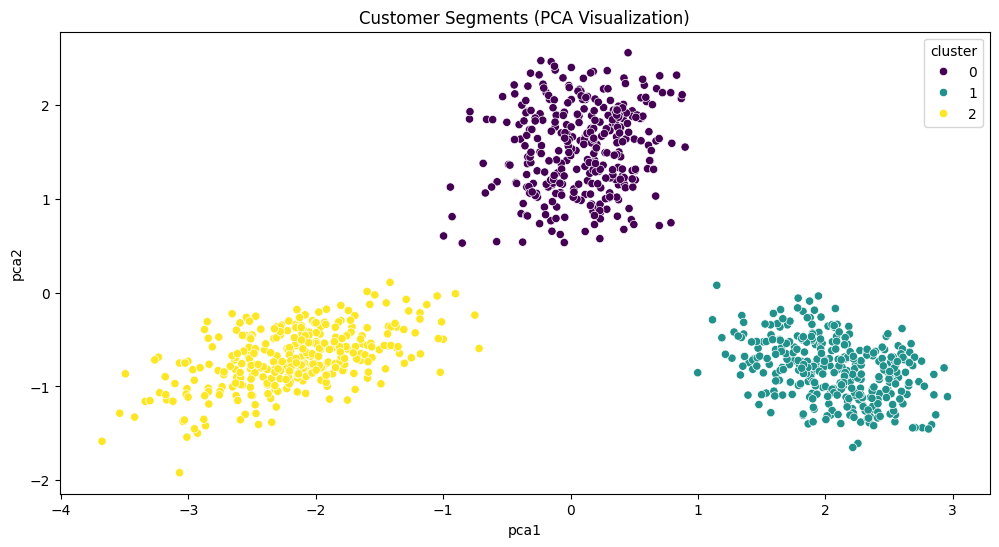

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assign clusters to df (Make sure 'clusters' is available)
df['cluster'] = models["K-Means"].fit_predict(scaled_data)

# Display cluster distribution
print("Cluster Distribution:")
print(df['cluster'].value_counts())

# PCA transformation
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('Customer Segments (PCA Visualization)')
plt.show()


In [36]:
print(df['cluster'].value_counts())  # Ensure clusters are well-separated


cluster
1    328
2    326
0    325
Name: count, dtype: int64


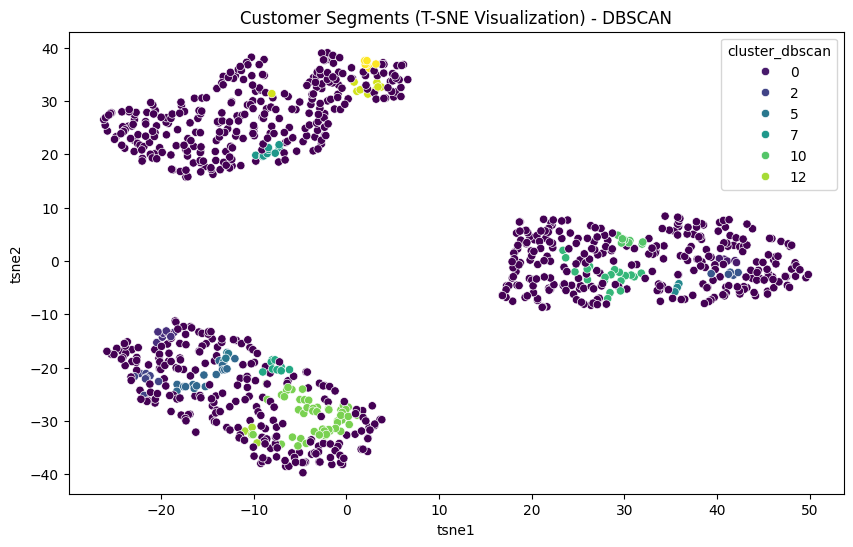

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Handle Non-Numeric Data
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])  # Convert categorical to numeric

# Step 2: Handle Missing Values
df = df.fillna(df.median())  # Fill NaNs with median values

# Step 3: Select Only Numeric Features
features = df.select_dtypes(include=['number'])

# Step 4: Scale the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Step 5: Apply T-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)
df['tsne1'] = tsne_data[:, 0]
df['tsne2'] = tsne_data[:, 1]

# Step 6: Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(scaled_data)

# Step 7: Visualize DBSCAN Clusters in T-SNE Space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='tsne1',
    y='tsne2',
    hue='cluster_dbscan',
    palette='viridis'
)
plt.title('Customer Segments (T-SNE Visualization) - DBSCAN')
plt.show()


Visualize Using T-SNE Instead of PCA
PCA might be causing overlap; try TSNE for better visualization

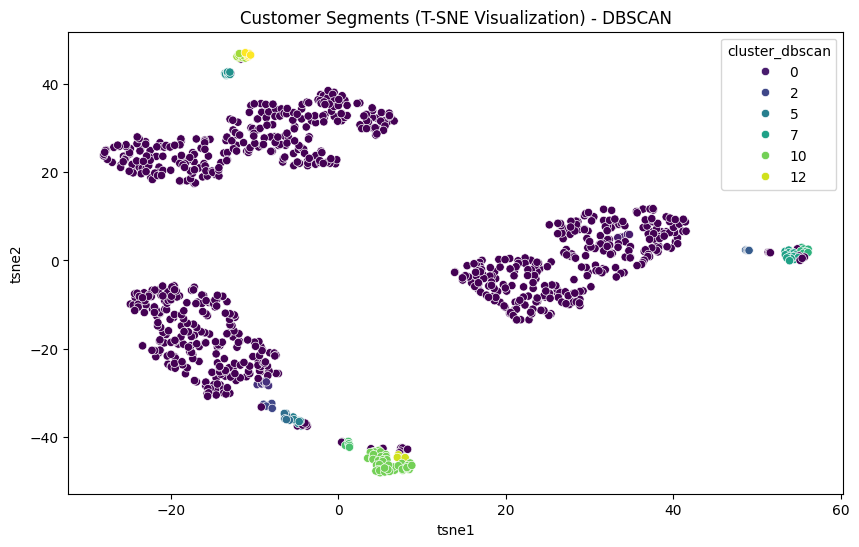

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Step 1: Handle Non-Numeric Data
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])  # Convert categorical to numeric

# Step 2: Handle Missing Values
df = df.fillna(df.median())  # Fill NaNs with median values

# Step 3: Select Only Numeric Features
features = df.select_dtypes(include=['number'])

# Step 4: Scale the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Step 5: Apply T-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)
df['tsne1'] = tsne_data[:, 0]
df['tsne2'] = tsne_data[:, 1]

# Step 6: Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(scaled_data)

# Step 7: Visualize DBSCAN Clusters in T-SNE Space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='tsne1',
    y='tsne2',
    hue='cluster_dbscan',
    palette='viridis'
)
plt.title('Customer Segments (T-SNE Visualization) - DBSCAN')
plt.show()




Cluster Distributions:
cluster_dbscan
-1     845
 10     40
 7      15
 6       8
 11      8
 4       8
 1       7
 9       7
 8       7
 2       7
 5       7
 13      6
 0       5
 3       5
 12      4
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_11108\1101271530.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


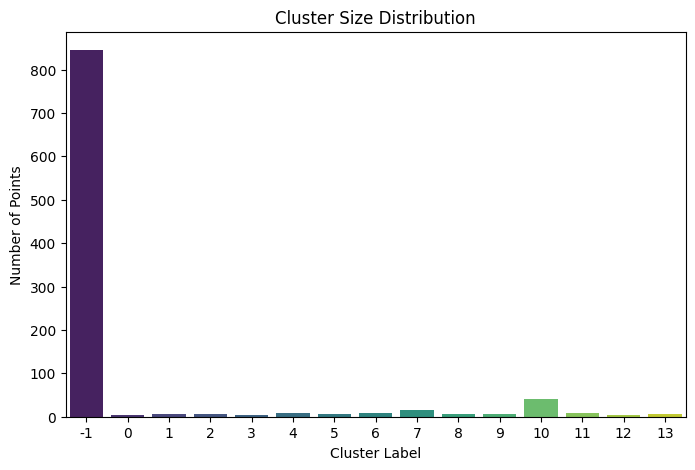

In [39]:
# ================================
# ✅ METHOD 1: CHECK CLUSTER DISTRIBUTIONS
# ================================
def check_cluster_distributions():
    cluster_counts = df['cluster_dbscan'].value_counts()
    print("\nCluster Distributions:")
    print(cluster_counts)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
    plt.xlabel("Cluster Label")
    plt.ylabel("Number of Points")
    plt.title("Cluster Size Distribution")
    plt.show()

check_cluster_distributions()



In [ ]:
# ================================
# ✅ METHOD 2: COMPARE CLUSTER CENTROIDS
# ================================
def compare_cluster_centroids():
    # Ignore noise points (-1 cluster)
    valid_clusters = df[df['cluster_dbscan'] != -1]
    
    # Compute centroids (mean values) for each cluster
    cluster_centroids = valid_clusters.groupby('cluster_dbscan')[features.columns].mean()
    
    print("\nCluster Centroids (Mean Values):")
    print(cluster_centroids)

compare_cluster_centroids()



Cluster Centroids (Mean Values):
                total_purchases  avg_cart_value  total_time_spent  \
cluster_dbscan                                                      
0                     18.200000       18.406000         17.344000   
1                      4.857143       67.238571         97.751429   
2                      4.714286       60.825714         76.045714   
3                     21.200000       14.750000         15.476000   
4                      5.875000       66.878750         88.880000   
5                      6.571429       45.278571         99.822857   
6                      8.625000      109.936250         31.381250   
7                     19.733333       39.024667         14.676667   
8                     15.285714       17.894286         13.321429   
9                      4.142857       26.601429        106.948571   
10                     4.600000       38.135250         99.155250   
11                    11.375000      160.542500         34.203750   


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


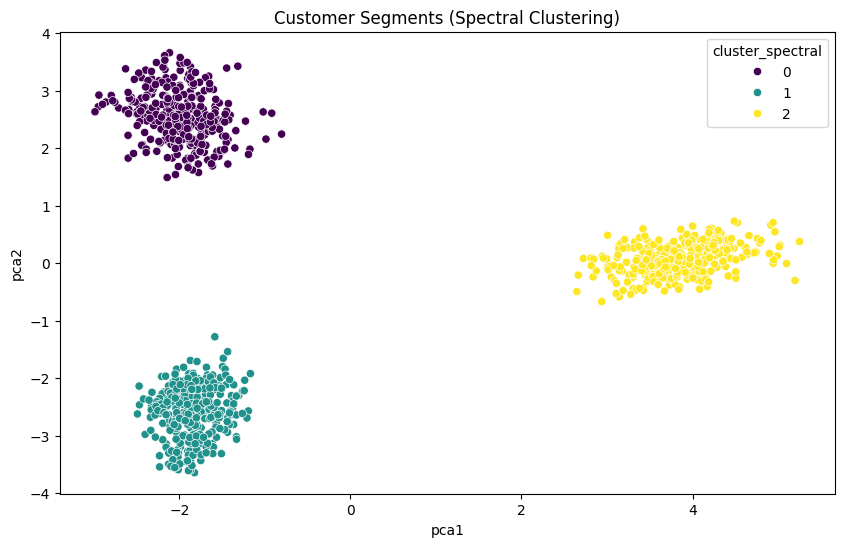

In [41]:
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA

# Step 1: Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors', n_init=10)
df['cluster_spectral'] = spectral.fit_predict(scaled_data)

# Step 2: Apply PCA for Visualization (if pca1 & pca2 are not defined)
pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(scaled_data)
df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]

# Step 3: Visualize Spectral Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster_spectral', palette='viridis')
plt.title('Customer Segments (Spectral Clustering)')
plt.show()


In [42]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

models = ["cluster_KMeans", "cluster_GMM", "cluster_Agglomerative", "cluster_dbscan", "cluster_spectral"]
results = {}

for model in models:
    if df[model].nunique() > 1:  # Avoid errors with single-cluster results
        results[model] = {
            "Silhouette": silhouette_score(scaled_data, df[model]),
            "Davies-Bouldin": davies_bouldin_score(scaled_data, df[model])
        }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:\n", results_df)



Model Performance Comparison:
                        Silhouette  Davies-Bouldin
cluster_KMeans           0.610810        0.617419
cluster_GMM              0.610810        0.617419
cluster_Agglomerative    0.610810        0.617419
cluster_dbscan          -0.414424        1.073625
cluster_spectral         0.610810        0.617419


In [43]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import pandas as pd

models = ["cluster_KMeans", "cluster_GMM", "cluster_Agglomerative", "cluster_dbscan", "cluster_spectral"]
results = {}

for model in models:
    if model in df.columns and df[model].nunique() > 1:  # Check if column exists & has >1 cluster
        labels = df[model].values

        # Handle DBSCAN noise points (-1)
        valid_idx = labels != -1  
        if valid_idx.sum() > 1:  # Ensure there are enough valid points
            silhouette = silhouette_score(scaled_data[valid_idx], labels[valid_idx])
        else:
            silhouette = np.nan  # Assign NaN if not enough clusters

        # Compute Davies-Bouldin Score
        davies_bouldin = davies_bouldin_score(scaled_data, labels)

        results[model] = {
            "Silhouette": silhouette,
            "Davies-Bouldin": davies_bouldin
        }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:\n", results_df)



Model Performance Comparison:
                        Silhouette  Davies-Bouldin
cluster_KMeans           0.610810        0.617419
cluster_GMM              0.610810        0.617419
cluster_Agglomerative    0.610810        0.617419
cluster_dbscan           0.365442        1.073625
cluster_spectral         0.610810        0.617419


In [44]:
cluster_centroids = df.groupby("cluster_dbscan").mean()
print("\nDBSCAN Cluster Centroids:\n", cluster_centroids)

cluster_centroids_spectral = df.groupby("cluster_spectral").mean()
print("\nSpectral Clustering Cluster Centroids:\n", cluster_centroids_spectral)



DBSCAN Cluster Centroids:
                 total_purchases  avg_cart_value  total_time_spent  \
cluster_dbscan                                                      
-1                    11.973964       78.344249         46.535598   
 0                    18.200000       18.406000         17.344000   
 1                     4.857143       67.238571         97.751429   
 2                     4.714286       60.825714         76.045714   
 3                    21.200000       14.750000         15.476000   
 4                     5.875000       66.878750         88.880000   
 5                     6.571429       45.278571         99.822857   
 6                     8.625000      109.936250         31.381250   
 7                    19.733333       39.024667         14.676667   
 8                    15.285714       17.894286         13.321429   
 9                     4.142857       26.601429        106.948571   
 10                    4.600000       38.135250         99.155250   
 11   

In [45]:
print(df[['cluster_KMeans', 'cluster_GMM', 'cluster_Agglomerative', 'cluster_dbscan', 'cluster_spectral']].apply(pd.Series.value_counts))


     cluster_KMeans  cluster_GMM  cluster_Agglomerative  cluster_dbscan  \
-1              NaN          NaN                    NaN             845   
 0            325.0        325.0                  326.0               5   
 1            328.0        328.0                  325.0               7   
 2            326.0        326.0                  328.0               7   
 3              NaN          NaN                    NaN               5   
 4              NaN          NaN                    NaN               8   
 5              NaN          NaN                    NaN               7   
 6              NaN          NaN                    NaN               8   
 7              NaN          NaN                    NaN              15   
 8              NaN          NaN                    NaN               7   
 9              NaN          NaN                    NaN               7   
 10             NaN          NaN                    NaN              40   
 11             NaN      